In [57]:
# Importing the dependencies of the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

### Loading the dataset

In [2]:
heart_data  = pd.read_csv("heart.csv")

In [3]:
# Printing out first 5 dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### First Data Preprocessing Stage

In [4]:
# Checking for the number of dataset
heart_data.shape
# We have 303 datasets and 14 column features

(303, 14)

In [5]:
# Checking for empty columns in the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Checking for missing information in the dataset
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Checking for the distribution of the target_variables
heart_data['target'].value_counts()
# 1----> have values of 165 defective hearts
# 0----> have values of 138 good hearts

target
1    165
0    138
Name: count, dtype: int64

In [8]:
# Spliting data into target and features
X = heart_data.drop(columns = ['target'], axis = 1)
y = heart_data['target']

In [103]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [105]:
# Converting dataset into numpy arrays because we do not need data standardization since we are using the RandomForest Classifier in addition
#X = np.asarray(X)
#y = np.asarray(y)

In [15]:
# Standardizing our dataset
Scaler = StandardScaler()

In [16]:
X = Scaler.fit_transform(X)

In [18]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [17]:
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [19]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [20]:
# Splitting our model into train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape)

(242, 13) (61, 13) (242,)


### Model Selection: 
### SVC, 
### LogisticRegression,
#### RandomForestClassifier
### and KNeighborsClassifier

In [108]:
# Comparing the models with default hyperparameter values using Cross_Val
# It is also good to standardize the dataset first

In [109]:
# List of the models:
models = [LogisticRegression(max_iter=1000), SVC(kernel = "linear"), KNeighborsClassifier(), RandomForestClassifier(random_state = 42)]

In [110]:
def compare_model_cross_val():
    for model in models:
        cv_score = cross_val_score(model, X, y, cv= 5)
        mean_acc = sum(cv_score)/len(cv_score)
        mean_acc = mean_acc*100
        mean_acc = round(mean_acc, 2)
        print("Cross validation score of the =", model, "=", cv_score)
        print("Mean accuracy score of: ", model, "is", mean_acc, "%")
        print("-------------------------------------------------------")

In [111]:
compare_model_cross_val()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross validation score of the = LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean accuracy score of:  LogisticRegression(max_iter=1000) is 82.83 %
-------------------------------------------------------
Cross validation score of the = SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean accuracy score of:  SVC(kernel='linear') is 82.83 %
-------------------------------------------------------
Cross validation score of the = KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean accuracy score of:  KNeighborsClassifier() is 64.39 %
-------------------------------------------------------
Cross validation score of the = RandomForestClassifier(random_state=42) = [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean accuracy score of:  RandomForestClassifier(random_state=42) is 83.82 %
-------------------------------------------------------


In [112]:
# Inference: Random Forest Classifer has the highest accuracy value with default hyperparamters followed by Logistic Regression model

In [113]:
# Comparing the models with diferent hyperparameter values using the GridSearchCV

In [114]:
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state = 42)]

In [115]:
# Creating a dictionary that contains all the hyperparameters values for the models above
model_hyper = {"log_reg":{"C": [1, 5, 20]}, "svm":{"kernel":["linear", "poly", "rbf", "sigmoid"], "C":[1, 5,10,20]},
               "knn":{"n_neighbors":[3,5,10]}, "randomforest": {"n_estimators":[10,20,50,100]}}
              

In [116]:
type(model_hyper)

dict

In [117]:
model_hyper.keys()

dict_keys(['log_reg', 'svm', 'knn', 'randomforest'])

In [118]:
model_hyper.values()

dict_values([{'C': [1, 5, 20]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'n_estimators': [10, 20, 50, 100]}])

In [119]:
model_keys = list(model_hyper.keys())

In [120]:
model_keys

['log_reg', 'svm', 'knn', 'randomforest']

In [121]:
model_hyper[model_keys[1]] # Indexing int the model_hyper parameters and model_keys

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

In [122]:
# Creating the function to do the hyperparameter searching using GridSearchCV
def model_Select(list_models, hyperparameter_dict):
    res = []
    i = 0
    for model in list_models:
        key = model_keys[i]
        params = hyperparameter_dict[key]
        i+=1
        print(model)
        print(params)
        classifier = GridSearchCV(model, params, cv = 5)
        # Fitting the data to the classifer
        classifier.fit(X,y)
        res.append({"Model_used": model, "Highest_val": classifier.best_score_, "Best_hperparameters": classifier.best_params_})
        res_dataframe = pd.DataFrame(res, columns =["Model_used", "Highest_val", "Best_hperparameters"])
    return res_dataframe

In [123]:
model_Select(models_list, model_hyper)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 20]}
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
RandomForestClassifier(random_state=42)
{'n_estimators': [10, 20, 50, 100]}


,Model_used,Highest_val,Best_hperparameters
0,LogisticRegression(max_iter=10000),0.831585,{'C': 5}
1,SVC(),0.828306,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.643880,{'n_neighbors': 5}
3,RandomForestClassifier(random_state=42),0.838197,{'n_estimators': 100}


### Inference: This indicates that the RandomForest is the best model for our dataset in order to obtain the highest accuracy possible

In [22]:
# Using the Logistic Model after model comparisom performance because the nature of the datase requires binary classfication 
# and hence LogisticRegression model is better over RandomForest Classification
model = LogisticRegression(max_iter = 10000)

In [23]:
# Fitting our model our splitted dataset
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [24]:
# Accuracy on the training dataset
y_train_pred = model.predict(X_train)

In [26]:
# Printing our accuracy data for the training dataset
print("Accuracy of training data: ", accuracy_score(y_train, y_train_pred))

Accuracy of training data:  0.8636363636363636


In [28]:
# Printing the accuracy of the testing data
y_test_pred = model.predict(X_test)

In [29]:
print("Accuracy of testing data: ", accuracy_score(y_test, y_test_pred))

Accuracy of testing data:  0.8524590163934426


In [31]:
# Checking for the confusion matrix for evaluation
cf_matrix =confusion_matrix(y_test, y_test_pred)

In [32]:
print(cf_matrix)

[[25  4]
 [ 5 27]]


In [37]:
tn, fp, fn, tn = cf_matrix.ravel() # Ravel unpacks all the confusion_matrix predictions of the dataset

In [36]:
print(tn, fp, fn, tn)

27 4 5 27


<Axes: >

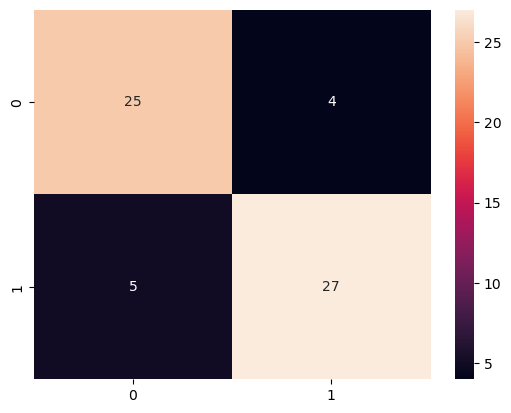

In [38]:
sns.heatmap(cf_matrix, annot = True)

### Further Model Evaluation Using Precsion_score, Recall and F1_score

In [45]:
# Calculating the precision for training data prediction
precision_train = precision_score(y_train, y_train_pred)

In [46]:
print(precision_train)

0.8472222222222222


In [47]:
# Calculating the precsion of testing data prediction
precision_test = precision_score(y_test, y_test_pred)

In [48]:
print(precision_test)

0.8709677419354839


In [49]:
# Recall calculation on training data
recall_train = recall_score(y_train, y_train_pred)

In [50]:
print(recall_train)

0.9172932330827067


In [51]:
# Recall calculation for the testing data
recall_test = recall_score(y_test, y_test_pred)

In [52]:
print(recall_test)

0.84375


In [53]:
# F1 score on the training data
f1_train = f1_score(y_train, y_train_pred)

In [54]:
print(f1_train)

0.8808664259927798


In [55]:
f1_test = f1_score(y_test, y_test_pred)

In [56]:
print(f1_test)

0.8571428571428571


In [58]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

